Sumber data : https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

**Overview Data**

Dataset merupakan hasil survey yang dilakukan kepengendara apakah dalam skenario tertentu, pihak pengendara akan menerima kupon yang diberikan

**Challenge**

Hanya 56.8% dari 12.684 kupon yang diberikan diterima oleh pengendara.

**Objectives**
1. Memberikan rekomendasi untuk meningkatkan persentase kupon yang diterima
2. Memberikan rekomendasi untuk jenis kupon yang sesuai dengan pengendara.



#1.Data Preparation

##1.1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [ ]:
!pip install matplotlib --upgrade  #Upgrade versi matplotlib ke yang paling terbaru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 5.2 MB/s 
     |████████████████████████████████| 295 kB 61.5 MB/s 
     |████████████████████████████████| 965 kB 65.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


##1.2. Import Data

In [ ]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [ ]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


##1.3. Preliminary and data cleansing

In [ ]:
df.shape

(12684, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
df.duplicated().sum()

74

In [ ]:
df = df.drop(columns='car')
df = df.drop_duplicates()
df = df.dropna()
new_df=df.copy()

**Summary - 1**
1. Data terdiri dari 26 feature dan 12.684 baris
2. Semua feature merupakan data categorical
3. Terdapat *missing value*, dimana pada feature `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, dan `Restaurant20To50` memiliki *missing value* dibawah 5% maka data akan didrop. Namun pada feature `car` memiliki *missing value* diatas 90% maka feature tersebut akan didrop
4. Terdapat *duplicated values* dimana data tersebut akan didrop

#2.Exploratory Data Analysis


**Deep Dive Question**
1. Kategori pengendara seperti apa yang akan memiliki penerimaan kupon yang tinggi?
2. Kupon seperti apa yang akan diterima oleh pengendara?
3. Pada situasi apa pemberian kupon memiliki penerimaan yang tinggi?

In [ ]:
for x in df.columns :
  print(f"Value counts of {x} column")
  print(df[x].value_counts(), '\n')

Value counts of destination column
No Urgent Place    5953
Home               3078
Work               2976
Name: destination, dtype: int64 

Value counts of passanger column
Alone        6914
Friend(s)    3142
Partner      1018
Kid(s)        933
Name: passanger, dtype: int64 

Value counts of weather column
Sunny    9545
Snowy    1323
Rainy    1139
Name: weather, dtype: int64 

Value counts of temperature column
80    6171
55    3652
30    2184
Name: temperature, dtype: int64 

Value counts of time column
6PM     3068
7AM     2976
10AM    2154
2PM     1913
10PM    1896
Name: time, dtype: int64 

Value counts of coupon column
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: coupon, dtype: int64 

Value counts of expiration column
1d    6702
2h    5305
Name: expiration, dtype: int64 

Value counts of gender column
Female    6158
Male      5849
Name: gender, dtype: int64 

Value coun

## 2.1 Data Tranformation


Perubahan penamaan pada data atau kolom untuk mempermudah penafsiran

In [ ]:
df['temperature'] = ['27 C' if x == 80 else ('13 C' if x == 55 else '-1 C') for x in df['temperature']]

In [ ]:
age_clarity={
    'below21':'<21',
    '21':'21 - 25',
    '26':'26 - 30',
    '31':'31 - 35',
    '36':'36 - 40',
    '41':'41 - 45',
    '46':'46 - 50',
    '50plus':'>50',
}

df['age']=df['age'].map(age_clarity)

In [ ]:
GEQ5min_clarity={
    1:'driving distance > 5 minutes',
    0:'driving distance < 5 minutes',
}
GEQ15min_clarity={
    1:'driving distance > 15 minutes',
    0:'driving distance < 15 minutes',
}
GEQ25min_clarity={
    1:'driving distance > 25 minutes',
    0:'driving distance < 25 minutes',
}

df['toCoupon_GEQ5min']=df['toCoupon_GEQ5min'].map(GEQ5min_clarity)
df['toCoupon_GEQ15min']=df['toCoupon_GEQ15min'].map(GEQ15min_clarity)
df['toCoupon_GEQ25min']=df['toCoupon_GEQ25min'].map(GEQ25min_clarity)

In [ ]:
time_clarity={
    '2PM':'14.00',
    '10AM':'10.00',
    '6PM':'18.00',
    '10PM':'22.00',
    '7AM':'07.00'
}

df['time']=df['time'].map(time_clarity)

In [ ]:
perweek_clarity={
    'Never':'0',
    'less1':'<1',
    '1~3' :'1-3',
    '4~8':'4-8',
    'gt8':'>8'
}

df['CoffeeHouse']=df['CoffeeHouse'].map(perweek_clarity)
df['CarryAway']=df['CarryAway'].map(perweek_clarity)
df['RestaurantLessThan20']=df['RestaurantLessThan20'].map(perweek_clarity)
df['Restaurant20To50']=df['Restaurant20To50'].map(perweek_clarity)

In [ ]:
df.rename(columns={'CoffeeHouse': 'CoffeeHouse Visit permonth',
                  'CarryAway': 'CarryAway Visit permonth',
                  'RestaurantLessThan20': 'Restaurant <20$ Visit permonth',
                  'Restaurant20To50': 'Restaurant 20$-50$ Visit permonth',


}, inplace=True)

##2.2 Multivariate Analysis

Pada tahap ini akan dilihat pada skenario apa penerimaan kupon akan lebih besar dari 56.8%

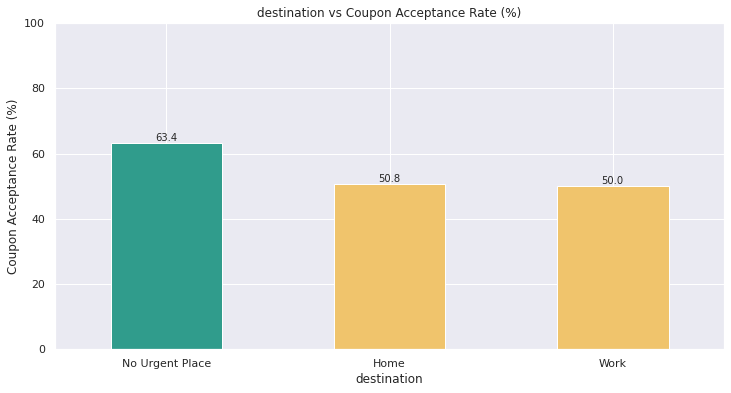

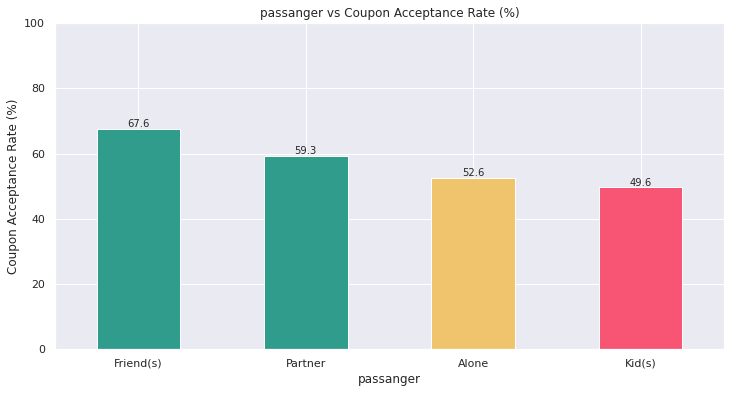

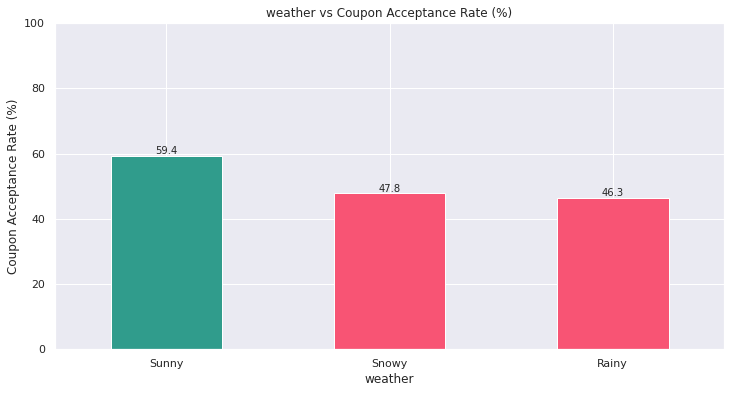

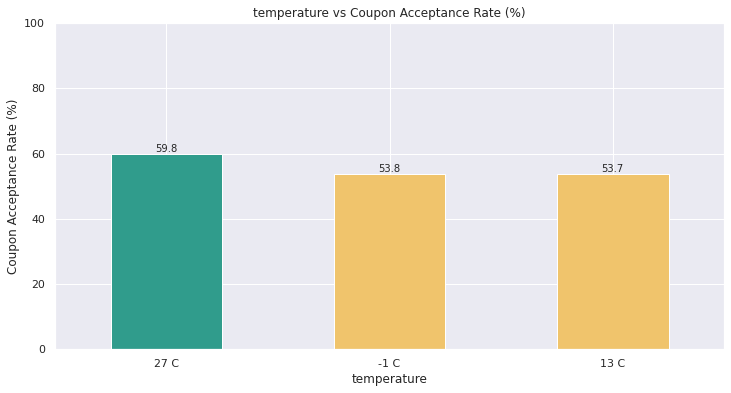

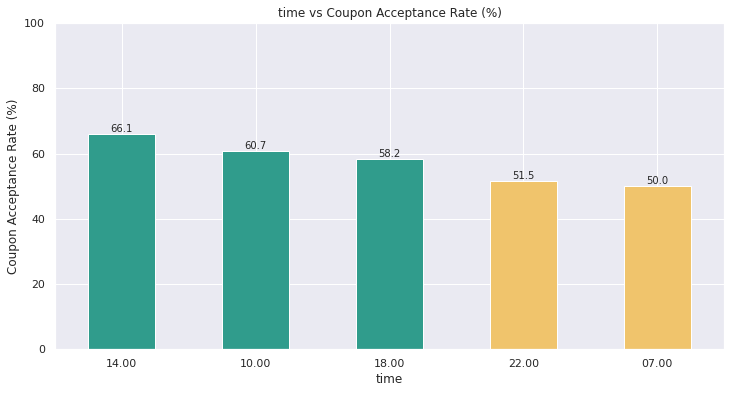

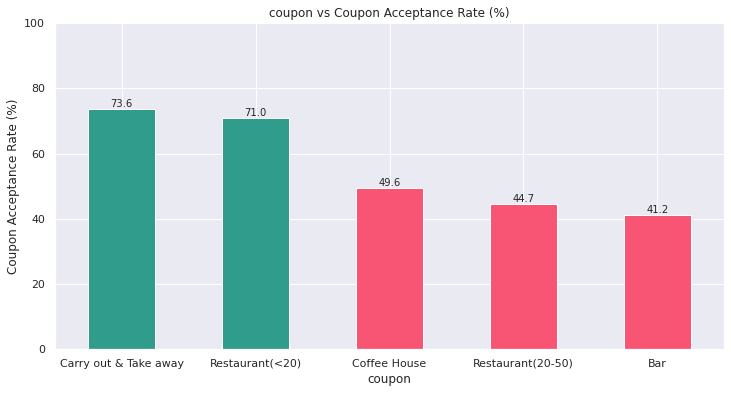

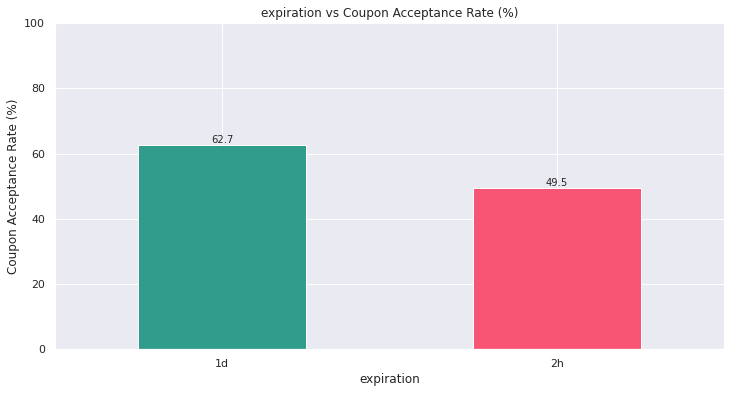

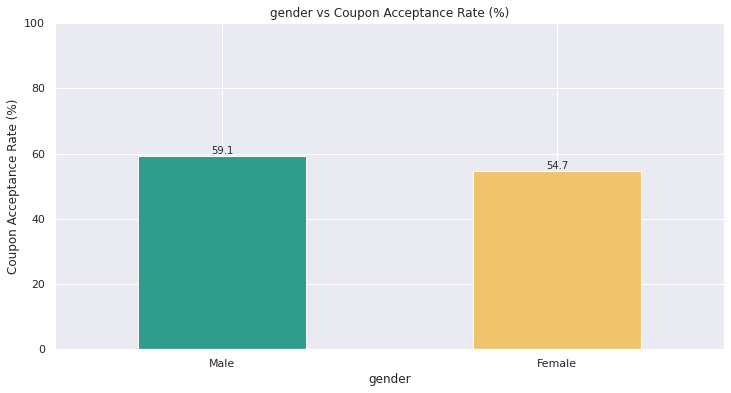

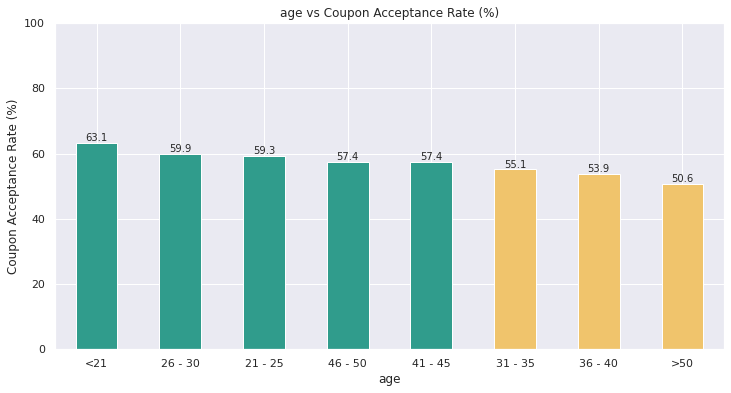

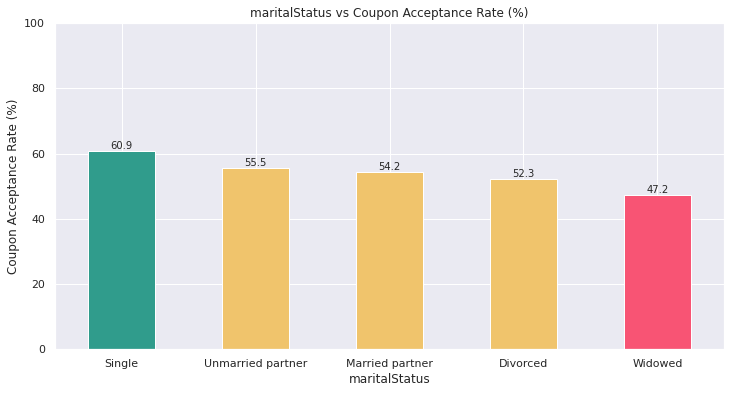

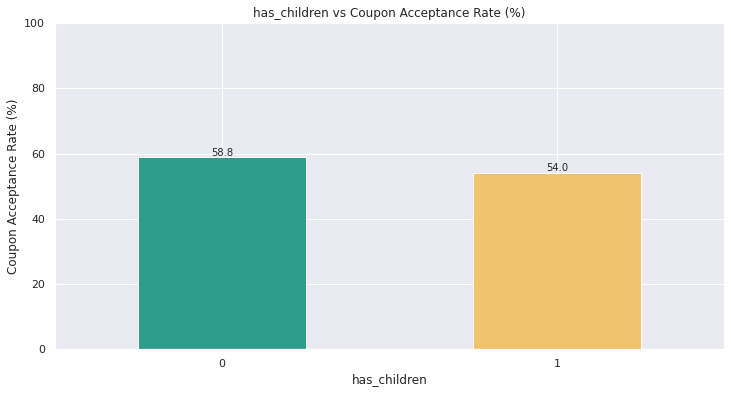

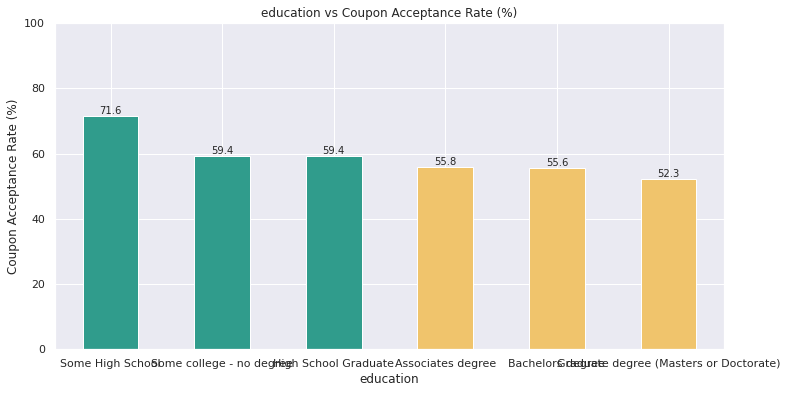

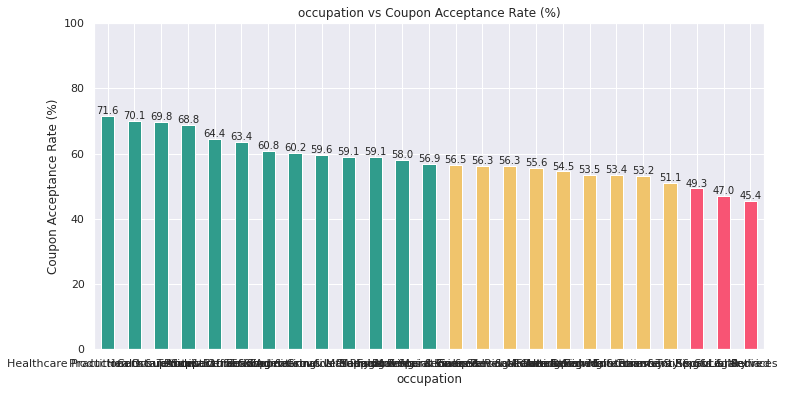

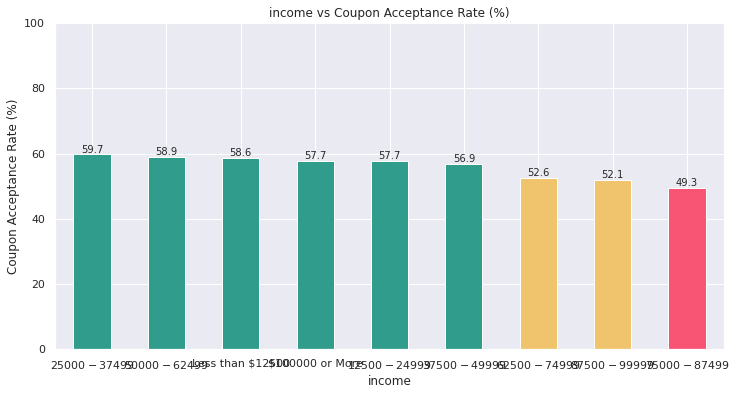

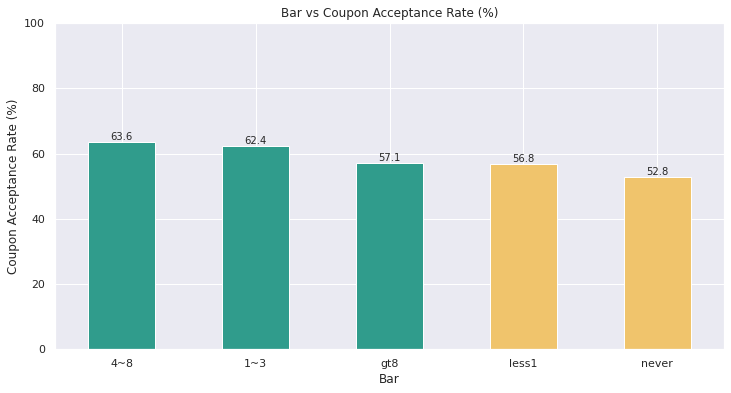

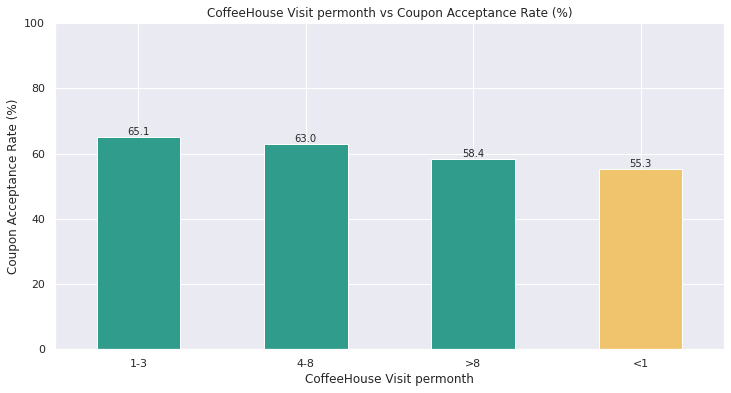

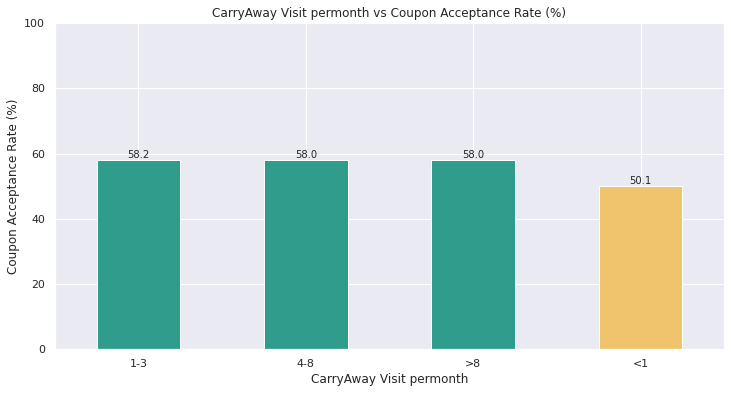

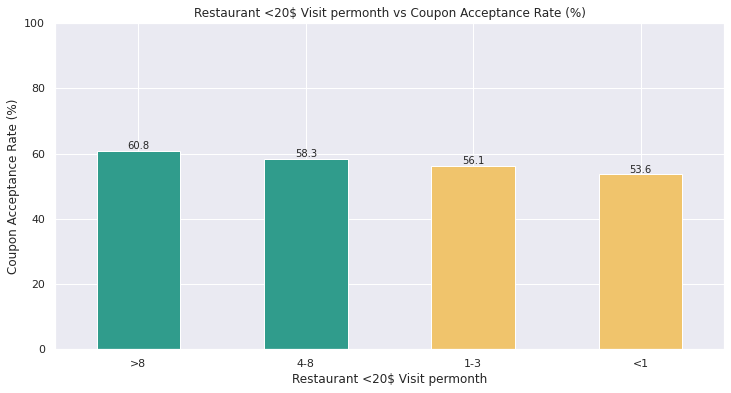

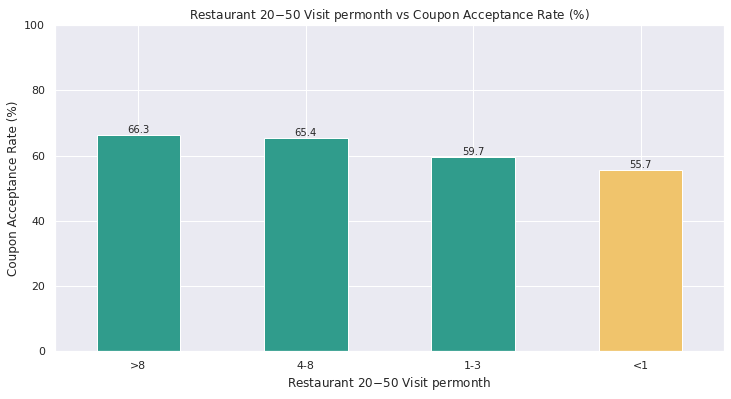

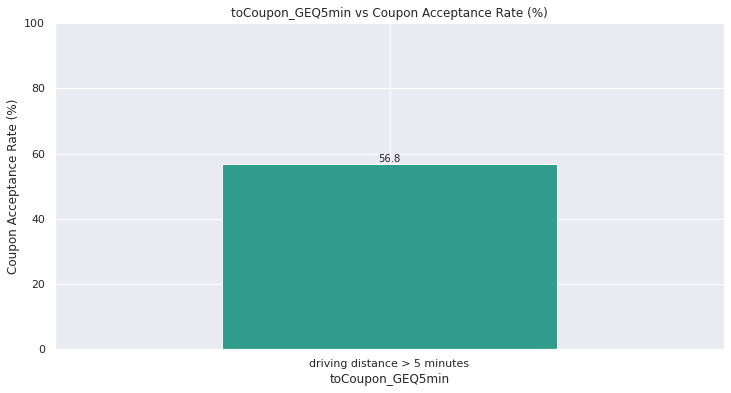

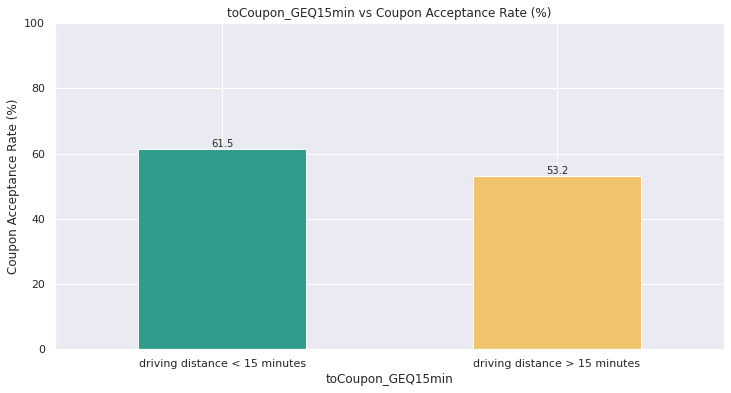

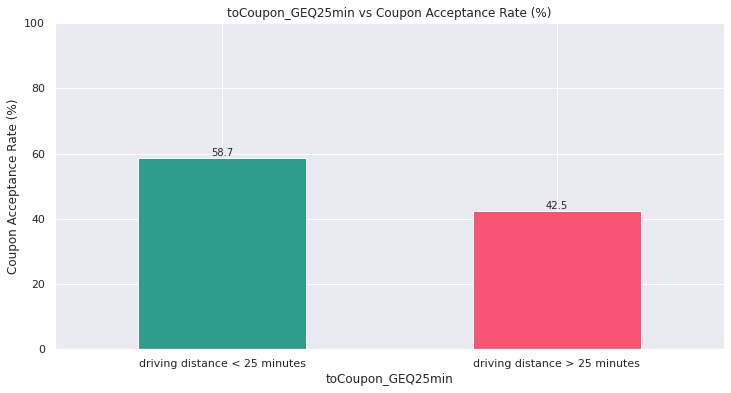

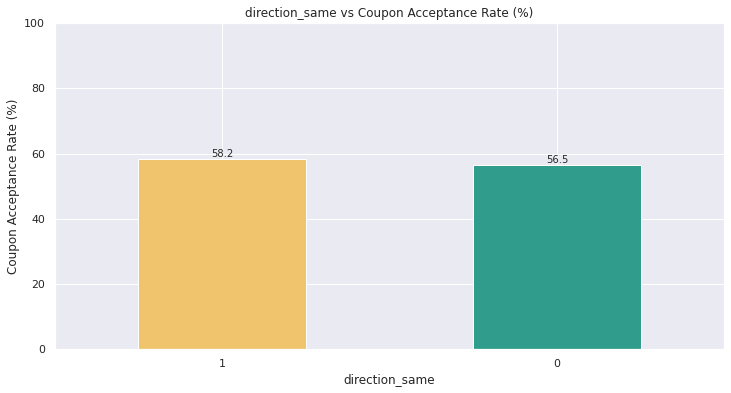

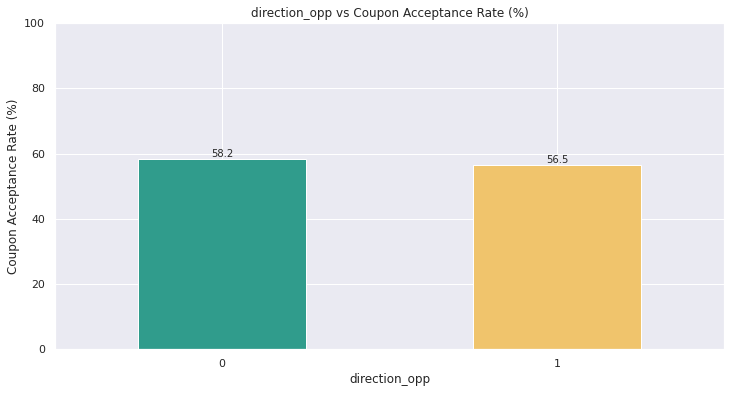

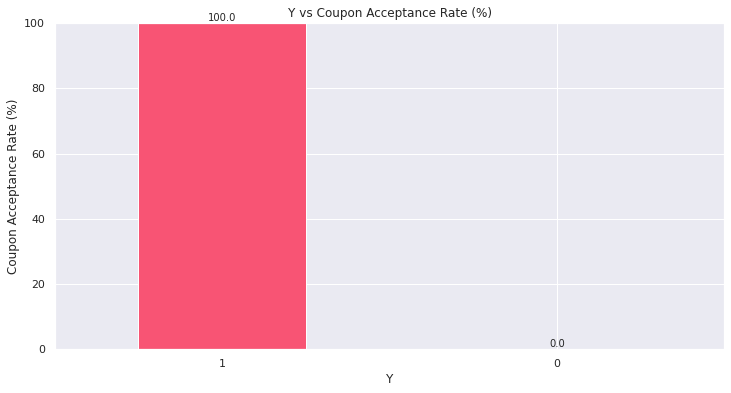

In [ ]:
for p in df.columns :
  bx = ((df.groupby([p])['Y'].mean())*100).sort_values(ascending=False)
  color_list = []
  for o in range(len(bx)):
    if bx[o] > 56.8:
      color_list.append('#309c8c')
    elif bx[o] < 50:
      color_list.append('#f85474')
    else:
      color_list.append('#f0c46c')

  ax = ((df.groupby([p])['Y'].mean())*100).sort_values(ascending=False).plot(kind='bar',figsize=(12,6),color=color_list)
  abs_values = round(((df.groupby([p])['Y'].mean())*100),1).sort_values(ascending=False)
  annotations = ax.bar_label(container=ax.containers[0], labels=abs_values)

  plt.xticks(rotation=0);
  plt.ylabel('Coupon Acceptance Rate (%)',fontsize=12)
  plt.title(f'{p} vs Coupon Acceptance Rate (%)',fontsize=12)
  plt.xlabel(p,fontsize=12)
  plt.ylim(0,100)

  plt.show()

**Summary - 2**

Skenario yang memiliki persentase penerimaan kupon >56.8%
1. Pengendara yang sedang berkendara bersama teman/patner
2. Kupon digunakan untuk carry out & take away atau restauran dengan biaya <20$ dan kadaluwarsa kupon adalah 1 hari
3. Pemberiaan saat kupon pada saat cuaca yang cerah, pada jam sekitar 10 pagi, 2 siang, atau 6 sore, dan lokasi jarak mengemudi untuk penggunaan kupon di bawah 15 menit

##2.3 Skenario Terbaik Untuk Pemberian Kupon

Pada tahap ini akan dianalisis pada skenario terbaik, persentase penerimaan kupon akan menjadi berapa

In [ ]:
best_scenario=df[(df['weather'] == 'Sunny')&((df['time'] == '14.00')|(df['time'] == '10.00')|(df['time'] == '18.00'))
  &((df['coupon'] == 'Carry out & Take away')|(df['coupon'] == 'Restaurant(<20)'))&(df['expiration'] == '1d')&(df['toCoupon_GEQ15min'] == 'driving distance < 15 minutes')]
best_scenario.shape

(546, 25)

In [ ]:
((best_scenario['Y'].mean())*100)

88.64468864468864

Text(0.5, 1.0, 'Skenario Terbaik')

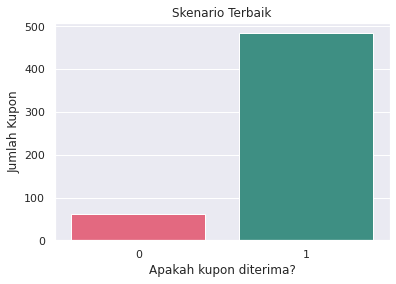

In [ ]:
sns.countplot(data=best_scenario,x=best_scenario['Y'], palette=['#f85474','#309c8c'])
plt.xlabel('Apakah kupon diterima?')
plt.ylabel('Jumlah Kupon')
plt.title('Skenario Terbaik',fontsize=12)

**Summary - 3**

Pada skenario terbaik persentase penerimaan kupon akan menjadi 88.6%


##2.4 Jenis kupon berdasarkan pengendara

Jenis kupon yang diberikan kepengendara akan disesuaikan berdasarkan rutinitas pengendara dalam mengunjungi tempat makan/minum.

In [ ]:
SurveyPengendara=['CarryAway Visit permonth','Restaurant <20$ Visit permonth','passanger']

In [ ]:
PengendaraPenerima=df[(df['Y'] == 1)]

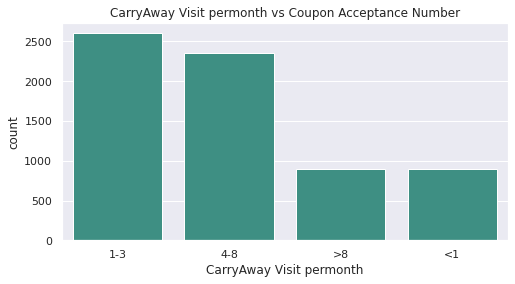

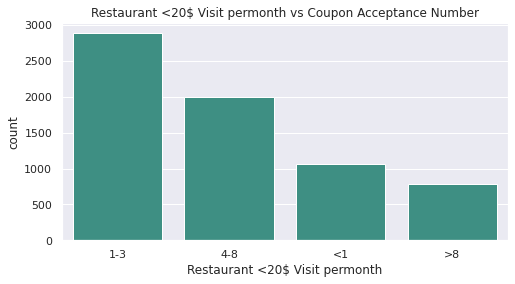

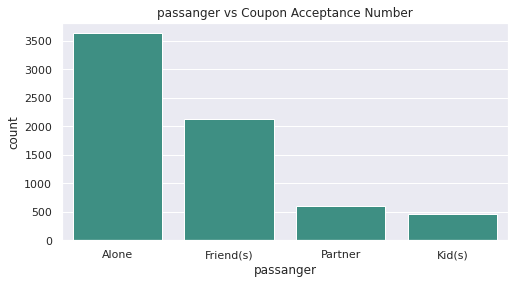

In [ ]:
for n in SurveyPengendara :
  plt.figure(figsize=(8, 4))
  plt.xticks(rotation=0);
  plt.ylabel('Coupon Acceptance Number')
  plt.title(f'{n} vs Coupon Acceptance Number',fontsize=12)
  plt.xlabel(n,fontsize=12)
  large_to_small = PengendaraPenerima.groupby(n).size().sort_values().index[::-1]
  sns.countplot(data=PengendaraPenerima,x=PengendaraPenerima[n],color='#309c8c',order=large_to_small)



**Summary - 4**

Berdasarkan rutinitas untuk melakukan kunjungan ketempat makan/minum. Pengendara sudah rutin dalam melakukannya. Maka dari itu kita dapat menggunakan kupon jenis kupon happy hours, dimana kupon harus digunakan oleh pelanggan pada waktu tertentu. Hal ini mendorong pelanggan untuk memakai kupon yang sudah diberikan. Pada kasus ini kupon digunakan pada waktu makan pelanggan pada umumnya.

Berdasarkan jumlah penumpang saat pengendara, Mayoritas pengendara hanya sendirian walaupun persentase penerimaan kupon ketika pengendara memiliki penumpang lebih tinggi. Maka dari itu kupon makan/minum digunakan untuk pembelian dengan porsi 1 orang saja. Dengan jumlah kupon yang diberikan disesuaikan dengan jumlah penumpang

#3.Kesimpulan


1.   Persentase peningkatan kupon meningkat menjadi 88,6% jika memenuhi poin-pon berikut :
> * Kegunaan kupon untuk carry out & take away atau restauran dengan biaya <20$
> * Kadaluwarsa kupon adalah 1 hari
> * Pemberiaan kupon pada saat cuaca yang cerah
> * Pemberiaan kupon pada jam 10 pagi, 2 siang, atau 6 sore
> * Lokasi jarak mengemudi untuk penggunaan kupon di bawah 15 menit


2.   Jenis kupon berdasarkan pelanggan adalah dengan kupon happy hours dengan tiap kuponnya digunakan untuk satu pelanggan.

